# Derivación numérica: diferencias finitas

### NOTA
Este notebook se iniciará en la clase; la resolución completa debe ser enviada como "Tarea3.ipynb", desde su carpeta de tareas. Se puede hacer en equipo, con un máximo de dos personas. Si se hace en equipo, incluyan ambos nombres de manera clara.

En este notebook, implementarán funciones que calculan la derivada numéricamente, de una función $f(x)$ en un punto $x_0$ dado.

## Derivada *derecha*

Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la definición de la derivada:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

que requiere la especificación de `h`. (Este método se conoce por el nombre de *diferencias finitas*.)

A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). (Para ser concretos, obtengan la derivada de la función de prueba $f(x) = 3x^3-2$, en $x_0=1$.) Dibujen, como función de $h$, el error de su cálculo (usar escala logarítmica en ambos ejes puede ser una buena idea). A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada? 


In [1]:
derivadaD(f,xo=0,h=eps(1.0)*2)=(f(xo+h)-f(xo))/h

derivadaD (generic function with 3 methods)

In [2]:
#Test con una función
f(x)=3x^3-2
derivadaD(f,1)

9.0

In [96]:
A=[]
Bd=[]
H=[]
for i=1:20
    h=1/(10.0^i)
    d=derivadaD(f,1,h)
    push!(A,i)
    push!(Bd,abs(9-d))
    push!(H,h)
end
Bd

20-element Array{Any,1}:
 0.93       
 0.0903     
 0.009003   
 0.00090003 
 9.00003e-5 
 8.99939e-6 
 9.04535e-7 
 3.41206e-8 
 7.44663e-7 
 7.44663e-7 
 7.44663e-7 
 0.000800105
 0.0071935  
 0.029398   
 0.769963   
 9.0        
 9.0        
 9.0        
 9.0        
 9.0        

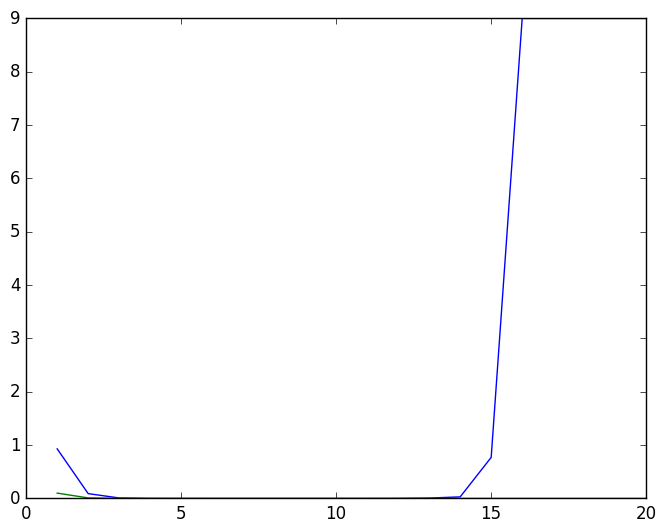

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001F50FCC0>

In [93]:
using PyPlot
plot(A,Bd)


Q: A partir de eso, ¿qué conclusión podemos sacar sobre la convergencia del cálculo numérico de la derivada?

Que conforme h se vuelve mas pequeña el calculo numérico se va acercando a error 0 y luego en cierto punto se dispara, y entonces la aproximación a la derivada siempre da como resultado 0 sin relación a la verdadera derivada

## Derivada simétrica

Repitan el ejercicio anterior usando cómo definición de la derivada la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}



In [14]:
#Derivada simetrica
derivadaS(f,xo=0,h=eps(1.0)*2)=(f(xo+h)-f(xo-h))/2h

derivadaS (generic function with 3 methods)

In [15]:
#Test con una funcion
f(x)=3x^3-2
derivadaS(f,1)

9.0

In [98]:
#Error con diferentes valores de h
Bs=[]
for i=1:20
    h=1/(10.0^i)
    d=derivadaS(f,1,h)
    push!(Bs,abs(9-d))
end
Bs

20-element Array{Any,1}:
 0.03       
 0.0003     
 3.0e-6     
 2.9995e-8  
 3.0321e-10 
 7.42659e-11
 8.13912e-10
 1.02883e-8 
 3.00574e-7 
 7.44663e-7 
 7.44663e-7 
 0.000356016
 0.00275261 
 0.029398   
 0.325873   
 4.55911    
 9.0        
 9.0        
 9.0        
 9.0        

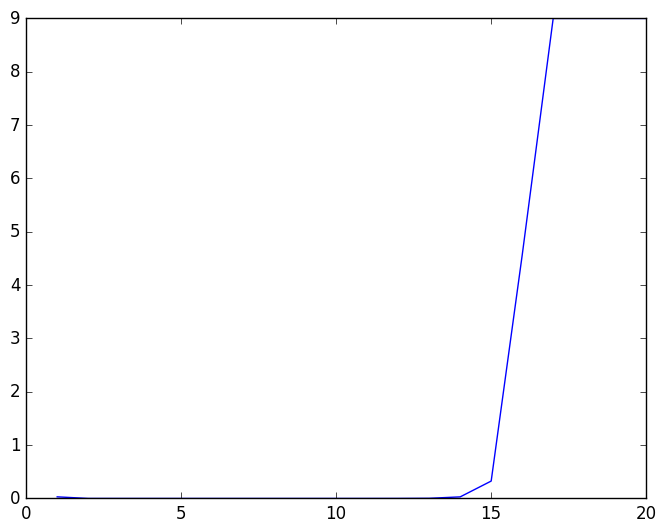

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001FE0E588>

In [99]:
plot(A,Bs)

## Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Así, tenemos la definición:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


In [18]:
#Derivada compleja
derivadaC(f,xo=0,h=eps(1.0)*2)=imag(f(xo+(h*im))/h)

derivadaC (generic function with 3 methods)

In [19]:
#Test con una funcion
f(x)=3x^3-2
derivadaC(f,1)

9.0

In [103]:
#Error con diferentes valores de h
Bc=[]
for i=1:20
    h=1/(10.0^i)
    d=derivadaC(f,1,h)
    push!(Bc,abs(9-d))
end
Bc

20-element Array{Any,1}:
 0.03       
 0.0003     
 3.0e-6     
 3.0e-8     
 3.0e-10    
 3.00027e-12
 3.01981e-14
 1.77636e-15
 0.0        
 0.0        
 0.0        
 1.77636e-15
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        

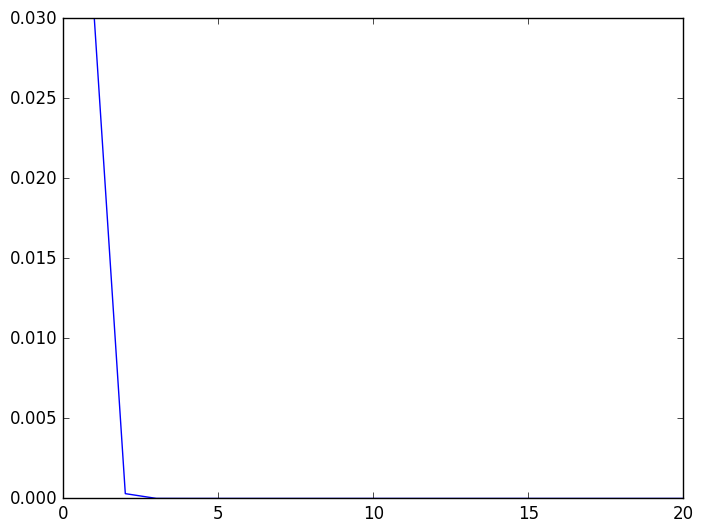

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002046F748>

In [104]:
plot(A,Bc)

## Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

In [106]:
print("\t Derecha \t\t Simétrica \t\t Compleja \n")
for i=1:length(Bd)
    if(abs(Bd[i])<abs(Bs[i]) && abs(Bd[i])<abs(Bc[i]))
        print("*")
    end
    print(Bd[i],"\t")
    if(abs(Bs[i])<abs(Bd[i]) && abs(Bs[i])<abs(Bc[i]))
        print("*")
    end
    print(Bs[i],"\t")
    if(abs(Bc[i])<abs(Bs[i]) && abs(Bc[i])<abs(Bd[i]))
        print("*")
    end
    print(Bc[i],"\n")
end

	 Derecha 		 Simétrica 		 Compleja 
0.9300000000000122	0.03000000000000469	*0.02999999999999936
0.0902999999999956	0.0003000000000046299	*0.0002999999999993008
0.00900299999829457	*2.9999992570139966e-6	3.0000000013075123e-6
0.0009000299939856404	*2.9995014472206094e-8	2.999999892949745e-8
9.000033286099551e-5	3.0320990163090755e-10	*3.000000248221113e-10
8.999393571684777e-6	7.426592674164567e-11	*3.000266701747023e-12
9.045354545378359e-7	8.139124929584796e-10	*3.019806626980426e-14
3.4120603231713176e-8	1.0288317753293086e-8	*1.7763568394002505e-15
7.446633389918134e-7	3.0057412914175075e-7	*0.0
7.446633389918134e-7	7.446633389918134e-7	*0.0
7.446633389918134e-7	7.446633389918134e-7	*0.0
0.0008001052410691045	0.0003560160312190419	*1.7763568394002505e-15
0.007193500536232023	0.0027526084377313964	*0.0
0.029397961028735153	0.029397961028735153	*0.0
0.7699626167013776	0.32587340685131494	*0.0
9.0	4.559107901499374	*0.0
9.0	9.0	*0.0
9.0	9.0	*0.0
9.0	9.0	*0.0
9.0	9.0	*0.0


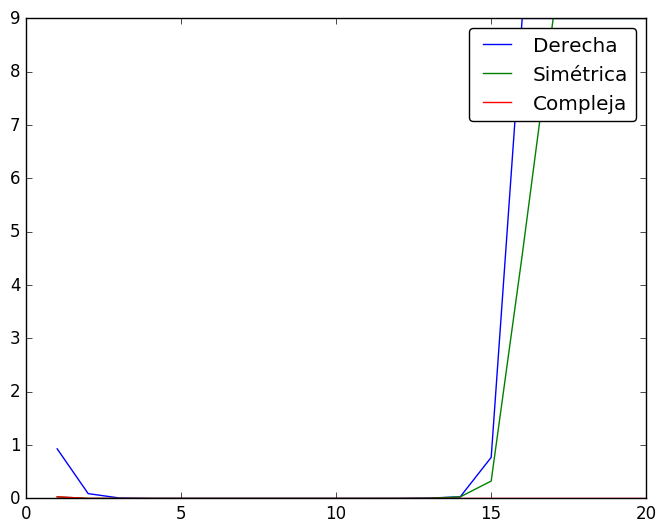

PyObject <matplotlib.legend.Legend object at 0x0000000020792748>

In [107]:
plot(A,Bd,label="Derecha")
plot(A,Bs,label="Simétrica")
plot(A,Bc,label="Compleja")
legend(loc="upper right",fancybox="true")

La compleja salta entre error 0 y error 1.7763568394002505e-15 mientras que las otras llega un punto en el que fallan totalmente, así que la compleja parece ser mejor en cuanto a convergencia

In [108]:
Bc=[]
for i=1:100
    h=1/(10.0^i)
    d=derivadaC(f,1,h)
    push!(Bc,abs(9-d))
end
Bc

100-element Array{Any,1}:
 0.03       
 0.0003     
 3.0e-6     
 3.0e-8     
 3.0e-10    
 3.00027e-12
 3.01981e-14
 1.77636e-15
 0.0        
 0.0        
 0.0        
 1.77636e-15
 0.0        
 ⋮          
 0.0        
 1.77636e-15
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        

- ¿Qué comportamiento de las derivadas en términos de $h$ nos incomoda (en lo más profundo de las entrañas)? ¿A qué se debe esto?

Talvez que si la h es muy pequeña entonces surgirían errores por como funciona la computadora, o talvez que si una función solo es smooth a una escala mas pequeña igual aparecerían errores aun siendo diferenciable. 